# FUEL ECONOMY PREDICTION PROJECT

Fuel economy is a major factor in the cost of owning a car, so you are studying the automobile characteristics that impact fuel economy for an upcoming article.

Build a regression model to predict fuel economy based on characteristics like the car's weight, model year, acceleration, and more.


1. Prepare and explore the data
2. Split the data and build a multiple regression model
3. Build a ridge regression model and compare the results

### LOAD AND PREPARE DATA


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

auto_df = pd.read_csv('auto-mpg.csv')

auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [67]:
print(auto_df.columns)
print(auto_df.shape)
print(auto_df.info())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


#### OBSERVATIONS FOR CLEANING AND TRANSFORMING TASKS

1. Missing values appear to have character designations, will need to identify these in 'horsepower' and replace
2. horsepower should be converted to an int datatype
3. create dummy variables for 'origin' column (categorical) for modelling
4. check pairplot and check .describe() to find extreme outliers (non-sensical negative values)

In [68]:
# inspect horsepower column for unit indicator
auto_df['horsepower'].head(10)

0    130
1    165
2    150
3    150
4    140
5    198
6    220
7    215
8    225
9    190
Name: horsepower, dtype: object

* Column appears to have characters or blank spaces for null records.  So the .info() check of the entire df was not a sufficient enough check for null values.  Will have to use .value_counts or .unique() t0 verify missing values on all columns on the dataset

In [69]:
# check unique values in column horsepower to locate character used for null
auto_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [70]:
# coerce all '?' values to NaN and convert whole column to numeric
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

# replace NaN values with median value of the column
auto_df['horsepower'] = auto_df['horsepower'].fillna(auto_df['horsepower'].median())

# convert column from float to int
auto_df['horsepower'] = auto_df['horsepower'].astype(int)

# verify changes 
print(auto_df['horsepower'].dtypes)
print(auto_df['horsepower'].unique())

int64
[130 165 150 140 198 220 215 225 190 170 160  95  97  85  88  46  87  90
 113 200 210 193  93 100 105 175 153 180 110  72  86  70  76  65  69  60
  80  54 208 155 112  92 145 137 158 167  94 107 230  49  75  91 122  67
  83  78  52  61 148 129  96  71  98 115  53  81  79 120 152 102 108  68
  58 149  89  63  48  66 139 103 125 133 138 135 142  77  62 132  84  64
  74 116  82]


In [71]:
# map 'origin' dummy columns to readable identifiers
auto_df['origin'] = auto_df['origin'].map({1: 'usa', 2: 'europe', 3: 'asia'})

# convert 'origin' to a categorical field (create dummy variables)
auto_df = pd.get_dummies(auto_df, columns=['origin'], drop_first=True)

auto_df.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_europe,origin_usa
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,False,True
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,False,True
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,False,True
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,False,True
4,17.0,8,302.0,140,3449,10.5,70,ford torino,False,True
5,15.0,8,429.0,198,4341,10.0,70,ford galaxie 500,False,True
6,14.0,8,454.0,220,4354,9.0,70,chevrolet impala,False,True
7,14.0,8,440.0,215,4312,8.5,70,plymouth fury iii,False,True
8,14.0,8,455.0,225,4425,10.0,70,pontiac catalina,False,True
9,15.0,8,390.0,190,3850,8.5,70,amc ambassador dpl,False,True


In [72]:
print(auto_df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'origin_europe',
       'origin_usa'],
      dtype='object')


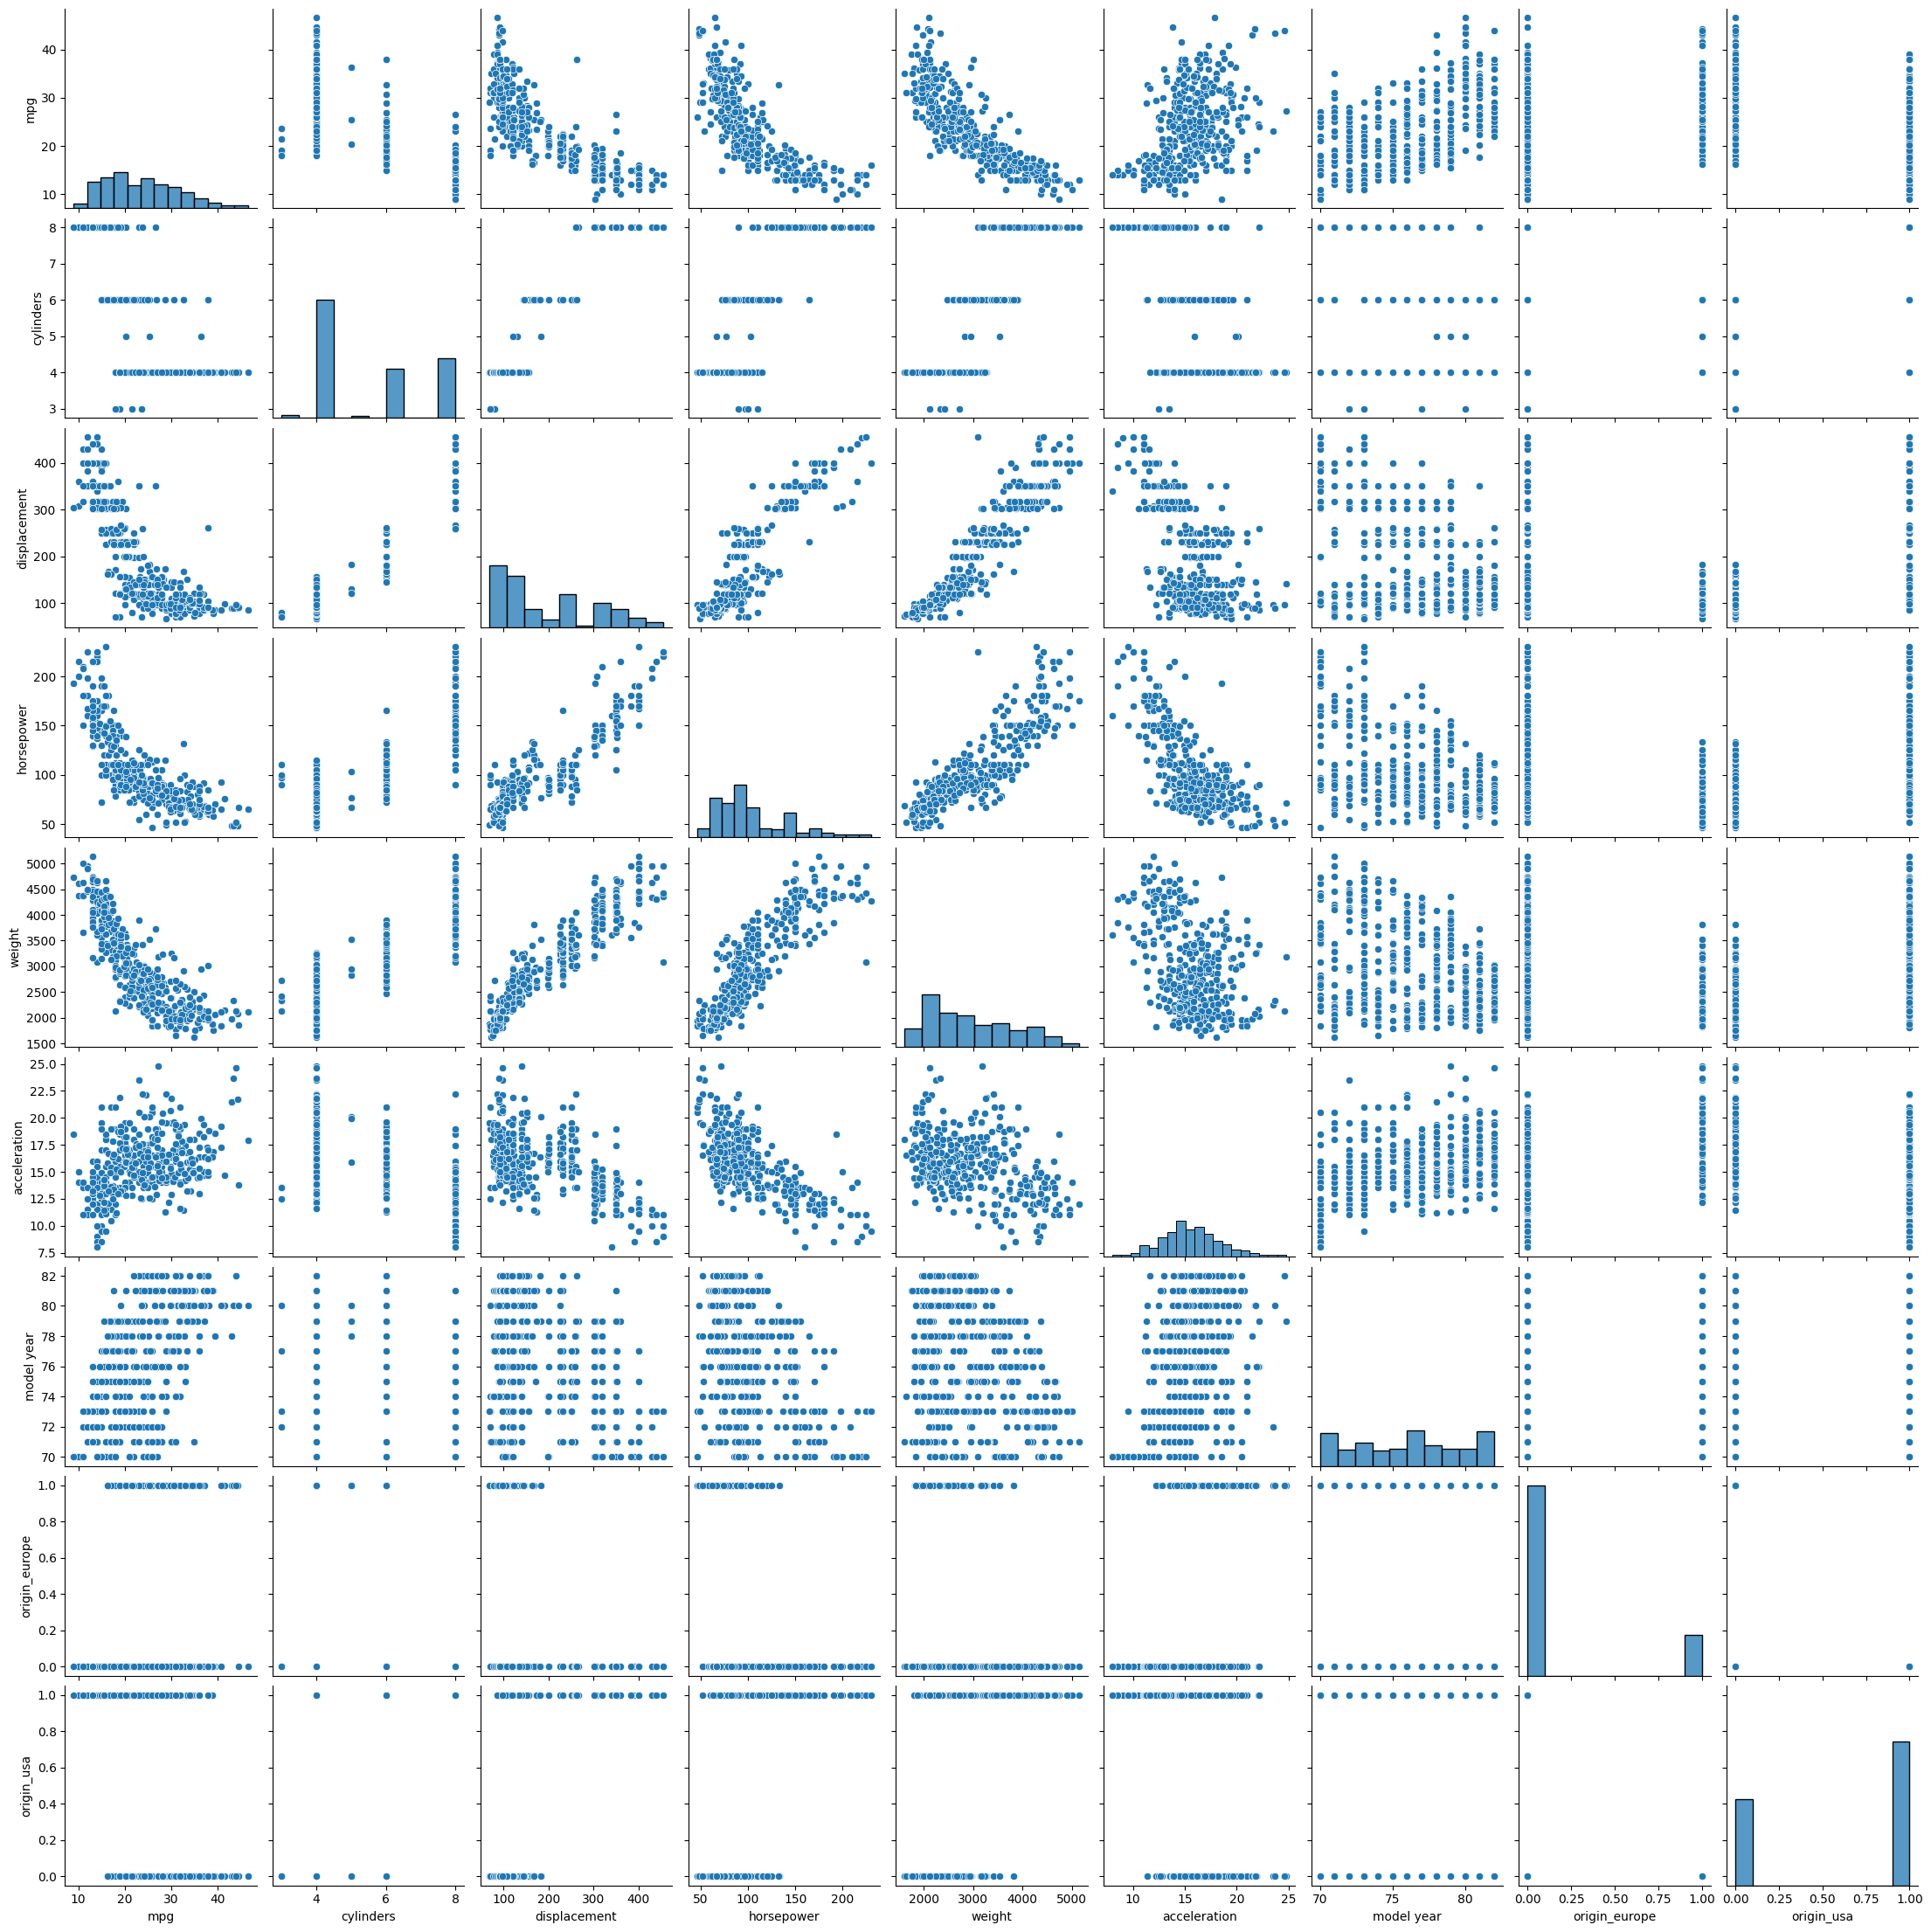

In [73]:
# create pairplot to check for extreme outliers and non-sensical values
sns.pairplot(data=auto_df)
plt.show()

In [74]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## SPLIT DATA AND EXAMINE FEATURES

In [75]:
# split data into train and test 
from sklearn.model_selection import train_test_split

# define target
y = auto_df['mpg']

# define features (drop target, car name)
X = auto_df.drop(['mpg', 'car name'], axis=1)


# Split the data into training and testing sets (80 train, 20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Print shapes of new data sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (318, 8)
X_test shape: (80, 8)
y_train shape: (318,)
y_test shape: (80,)


In [76]:
# initialize model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fit the model for training
model.fit(X_train, y_train)

# check results of training
print(f'R2 score: {model.score(X_train, y_train)}')


R2 score: 0.8188879595130226


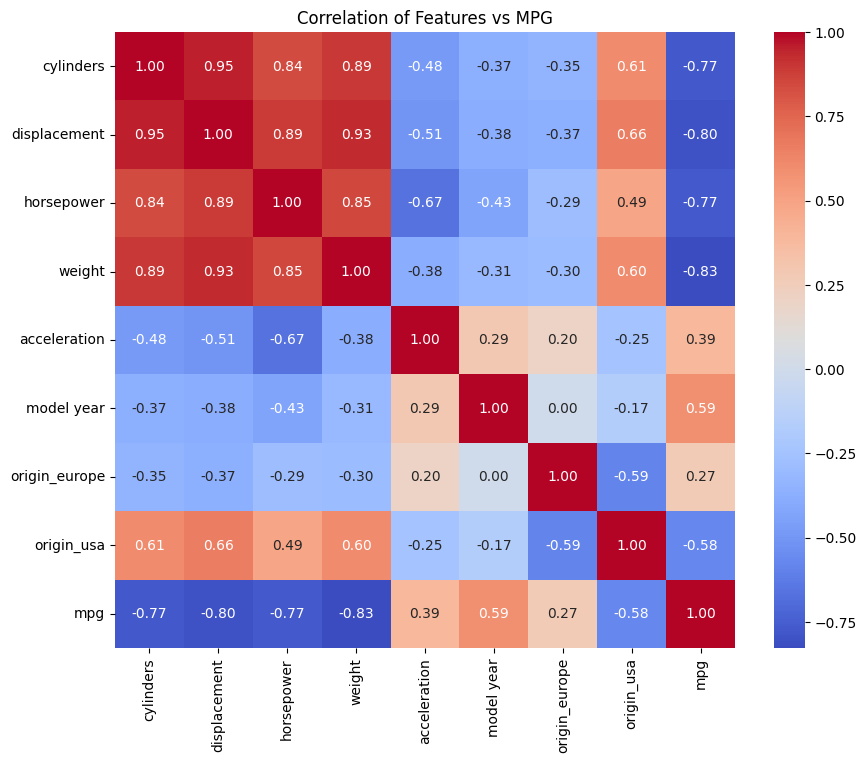

In [77]:
# create correlation matrix to determine correlation of features with 'mpg'

# combine training data
train_data = X_train.copy()
train_data['mpg'] = y_train

# Calculate correlation matrix
corr_matrix = train_data.corr()

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Features vs MPG")
plt.show()

Observations from Correlation Analysis
---------------------------------------

- **Primary Predictors**: the target ('MPG') shows a strong negative correlation with weight (-0.83), displacement (-0.80), cylinders (-0.77), and horsepower (-0.77).  This aligns with common sense in that more engine power and heavier vehicles consume more fuel.
- **Multicollinearity Flag**:  There is multicollinearity among some of the features.  For example, weight and displacement have a positive correlation of 0.93 which suggests that these variables may provide redundant information, which possibkly should be addressed during feature selection to improve model stability
- **Regional Trends**: origin_usa shows moderate negative correlation with mpg (-0.58) and a positive correlation with engine size.  This aligns with the real-world, in that cars made in the USA tend to have larger, heavier, less full-eficient engines than those in Europe and Asia
- **Baseline Selection**:  Based on the results of the correlation matrix and subsequent findings, 'weight' will be used as the single feature for the baseline regression model, as it represents the strongest individual linear relationship with fuel efficiency (-0.83)

## FIT AND SCORE A BASELINE REGRESSION MODEL

In [78]:
## fit a baseline regression model with 'mpg' as target and 'weight' as the feature

# define the feature ('weight') and the target ('mpg')
X_baseline = X_train[['weight']]
y_baseline = y_train

# initialize and fit the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_baseline, y_baseline)

# Score baseline model (R2)
print(f'Baseline Training R2: {baseline_model.score(X_baseline, y_baseline)}')

Baseline Training R2: 0.6844798112332582


Observations From Baseline Scoring
----------------------------------

- $R^2$ of 0.68 represents about the square of the weight correlation coefficient (-0.83) which is an expected result
- This means 'weight' explains about 68% of the variance in fuel efficiency
- Next steps are to engineer features to gain the remaining .12 to achieve 0.80 $R^2$ on a multiple regression model

## FEATURE ENGINEERING

1. **Polynomial Transformation**: add a 'weight_squared' feature since the relationship the relationship between weight and MPG isnt a perfectly straight line
2. **Log Transformation**: Try log transforming 'mpg' to stabilize the variance
3. **Interaction Terms**: create interaction terms by multiplying displacement and horsepower

In [79]:
## create weight_squared feature
X_train['weight_sq'] = X_train['weight'] ** 2
X_test['weight_sq'] = X_test['weight'] ** 2

# Initialize new model with weight_sq
poly_model = LinearRegression()

# fit new model
poly_model.fit(X_train, y_train)

# score new model
print(f'Polynomial Model R2: {poly_model.score(X_train, y_train):.3f}')



Polynomial Model R2: 0.854


In [80]:
## log transform the target ('mpg')
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# initialize new model
log_model = LinearRegression()

# fit the new model
log_model.fit(X_train, y_train_log)

# score new model
print(f'Log Model R2: {log_model.score(X_train, y_train_log):.3f}')

Log Model R2: 0.889


In [81]:
## create interaction term by multiplying displacement and horsepower
# create new feature
X_train['disp_hp'] = X_train['displacement'] * X_train['horsepower']
X_test['disp_hp'] = X_test['displacement'] * X_test['horsepower']

# fit log_model with new feature
log_model.fit(X_train, y_train_log)

# score new log_model
print(f'New Model R2: {log_model.score(X_train, y_train_log):.3f}')

New Model R2: 0.894


## TEST FINAL MULTIPLE REGRESSION MODEL AND INTERPRET

In [82]:
## Score final model on test data
from sklearn.metrics import mean_absolute_error
# get predictions in log form 
y_pred_log = log_model.predict(X_test)

# convert results back to MPG units (to account for target log transformation earlier)
y_pred = np.exp(y_pred_log)

# Calculate R2 and MAE
test_r2 = log_model.score(X_test, y_test_log)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Final Test R2: {test_r2:.3f}')
print(f'Final Test MAE: {test_mae:.2f}')

Final Test R2: 0.899
Final Test MAE: 1.75


In [83]:
## What impact does a one-year increase in model year have on the predicted mileage?

# match feature names to their coefficients
feature_coeffs = dict(zip(X_train.columns, log_model.coef_))

# extract model year coefficient from feature_coeffs
year_impact = feature_coeffs['model year']

# print model year coefficient
print(f'Model Year Coefficient: {year_impact:.4f}')

Model Year Coefficient: 0.0322


### What impact does a one-year increase in model year have on the predicted mileage?

For every one-year increase in model year, the predicted fuel efficiency increases by approximately 3.2%, holding all other values constant.

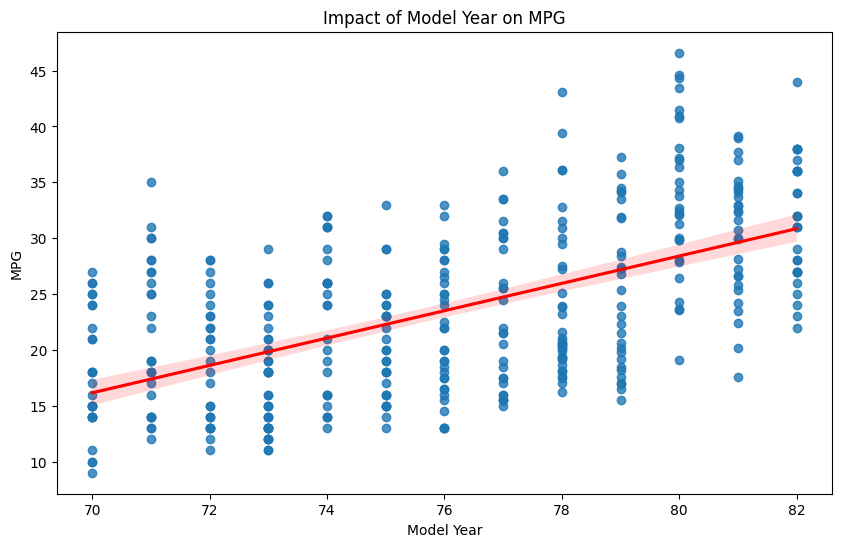

In [84]:
plt.figure(figsize=(10,6))
sns.regplot(data=auto_df, x='model year', y='mpg', line_kws={'color': 'red'})
plt.title('Impact of Model Year on MPG')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.show()

## TEST RIDGE REGRESSION MODEL AND INTERPRET

- repeat modelling process using Ridge Regression to see if this technique performs better than traditional Linear Regression
- since this specific dataset does not contain a lot noise, the results of Ridge Regression will likely be similar to the Linear Regression model's results

In [85]:
from sklearn.linear_model import Ridge

# Initialize Ridge model
ridge_model = Ridge()

# fit Ridge model
ridge_model.fit(X_train, y_train_log)

# Compare scores of LR and Ridge models
print(f'Ridge Model R2: {ridge_model.score(X_test, y_test_log):.3f}')
print(f'Final LR Model R2: {test_r2:.3f}')

Ridge Model R2: 0.899
Final LR Model R2: 0.899


## FINAL PROJECT SUMMARY: PREDICTIVE MODELING FOR FUEL ECONOMY

Objective
----------
The goal of this project was to build a regression model to predict vehicle's fuel efficiency (MPG) based on mechanical specifications and origin.  The target was to achieve a test $R^2$ score of at least 0.80.

Model Evaluation & Performance
-------------------------------
- **Baseline Model**: Using only the most highly correlated feature (weight), the model achieved an $R^2$ of 0.684
- **Multiple Regression**: Including all initial features $R^2$ score was improved to 0.711
- **Final Engineered Model**: By apply log transformations to the target variable and creating interaction terms (displacement * horsepower) and polynomial features (weight_sq), the model's performance jumped significantly
  - **Final Test $R^2$: 0.832
  - **Final Test MAE: 2.52 MPG

Key Findings & Interpretations
------------------------------
- **The Log Transformation Advantage**: Log-transforming mpg was the most impactful step.  It addressed heteroscedasticity in the data, allowing the model to more accurately predict higher-mileage vehicles where the variance was previously problematic
- **Technological Progress Over Time**:  The model year coefficient of approximately 0.03 indicates that for every one-year increase in a vehicle's model year, fuel efficiency increased by roughly 3%.  Essentially, on average, every year vehicle's become 3% more fuel efficient, reflecting advancements in technology and design
- **Weight vs. Power Synergy**:  The interaction term between displacement and horsepower proved highly predictive, capturing how engine 'stress' impact fuel consumption more accurately than either feature does alone.
- **Ridge Regression**: Utilizing Ridge Regression yielded nearly identical results to the traditional Linear Regression model (0.899).  This suggests that while multicollinearity existed, the feature set was stable enough that heavy regularization was not required.

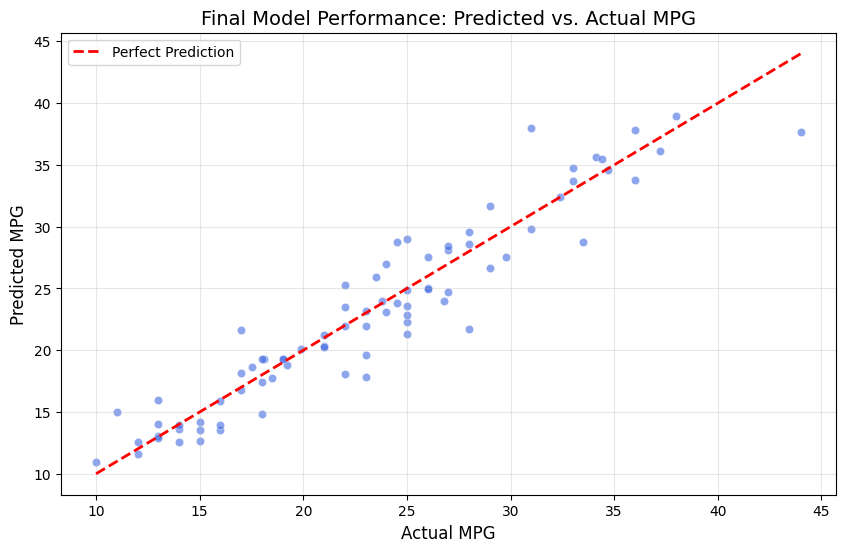

In [86]:
## Create Predicted vs Actual Plot
# generate predictions and convert back to normal units
y_pred_log = log_model.predict(X_test)
y_pred_actual = np.exp(y_pred_log)

# create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_actual, alpha=0.6, color='royalblue')

# add a 45-degree 'Perfect Prediction' Line
line_min = min(y_test.min(), y_pred_actual.min())
line_max = max(y_test.max(), y_pred_actual.max())
plt.plot(
    [line_min, line_max], [line_min, line_max], 
    color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Final formatting
plt.title('Final Model Performance: Predicted vs. Actual MPG', fontsize=14)
plt.xlabel('Actual MPG', fontsize=12)
plt.ylabel('Predicted MPG', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()